
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy', 'alabama-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,250.55,97.90,-2.00,-10.64,-6.86,21.92,10.24,25.39,-6.86,-174.18
1,AXP,American Express,US Stocks:Financials,285.09,152.75,32.01,18.07,16.27,21.36,11.81,28.75,16.27,0.57
2,AMGN,Amgen,US Stocks:Healthcare,152.78,36.09,13.99,12.32,12.01,17.01,7.79,22.98,12.01,0.52
3,AAPL,Apple,US Stocks:Technology,21.97,60.75,53.61,12.75,38.73,14.05,6.58,26.76,38.73,1.45
4,BA,Boeing,US Stocks:Industrials,502.45,241.97,38.37,6.45,-3.29,19.26,6.74,39.47,-3.29,-129.86
5,CAT,Caterpillar,US Stocks:Industrials,668.93,40.45,26.04,20.91,21.40,25.90,4.78,37.12,21.40,0.58
6,CVX,Chevron,US Stocks:Energy,53.72,-36.16,-12.41,25.80,11.20,18.45,7.79,29.90,11.20,0.37
7,CSCO,Cisco,US Stocks:Technology,82.49,-19.74,10.62,7.16,6.50,10.96,4.19,25.04,6.50,0.26
8,KO,Coca-Cola,US Stocks:Consumer Staples,26.94,26.76,-4.37,6.03,7.70,11.61,8.66,17.88,7.70,0.43
9,DIS,Disney,US Stocks:Communication Services,-22.21,56.03,7.62,-20.29,-2.95,17.20,10.96,32.01,-2.95,-94.43


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
3,AAPL,Apple,US Stocks:Technology,21.97,60.75,53.61,12.75,38.73,14.05,6.58,26.76,38.73,1.45
20,MSFT,Microsoft,US Stocks:Technology,-8.55,102.81,61.76,19.73,31.38,14.25,9.92,23.39,31.38,1.34
25,UNH,UnitedHealth Group,US Stocks:Healthcare,-14.06,20.51,1.13,16.63,18.19,13.10,10.78,20.40,18.19,0.89
32,VMC,Vulcan Materials Company,US Stocks:Materials,118.69,60.76,31.52,16.80,19.35,12.80,7.02,25.13,19.35,0.77
18,MCD,McDonald's,US Stocks:Consumer Staples,110.20,64.36,14.38,14.00,13.63,13.01,7.64,17.94,13.63,0.76
33,HIBB,Hibbett Sports,US Stocks:Consumer Discretionary,431.19,436.40,10.66,14.61,39.67,35.30,17.27,53.53,39.67,0.74
11,GS,Goldman Sachs,US Stocks:Financials,351.04,108.76,16.76,16.99,21.30,25.99,9.20,29.05,21.30,0.73
12,HD,Home Depot,US Stocks:Consumer Discretionary,266.21,77.72,12.82,11.46,18.14,16.53,4.45,25.41,18.14,0.71
29,WMT,Walmart,US Stocks:Consumer Discretionary,17.89,-4.17,13.28,4.38,13.34,14.00,7.38,18.70,13.34,0.71
22,PG,Procter & Gamble,US Stocks:Consumer Staples,-30.93,4.47,-1.12,4.41,12.57,19.13,14.92,19.06,12.57,0.66


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,AAPL,MSFT,UNH,VMC,MCD,HIBB,GS,HD,WMT,PG,...,IBM,TRV,CAT,JPM,AXP,MRK,AMGN,HON,JNJ,Ranked Portfolio
Annual Returns,38.73,31.38,18.19,19.35,13.63,39.67,21.30,18.14,13.34,12.57,...,13.92,12.51,21.40,15.33,16.27,12.05,12.01,12.04,7.09,19.15
Std Dev,26.76,23.39,20.40,25.13,17.94,53.53,29.05,25.41,18.70,19.06,...,21.49,20.60,37.12,26.62,28.75,22.84,22.98,23.61,15.01,20.39
Sharpe Ratio,1.45,1.34,0.89,0.77,0.76,0.74,0.73,0.71,0.71,0.66,...,0.65,0.61,0.58,0.58,0.57,0.53,0.52,0.51,0.47,0.94
Weight,0.08,0.08,0.04,0.12,0.07,0.04,0.02,0.04,0.04,0.07,...,0.08,0.02,0.07,0.02,0.02,0.04,0.04,0.07,0.04,1.00
Worst Typical Down Year,-14.79,-15.40,-22.61,-30.91,-22.25,-67.39,-36.80,-32.68,-24.06,-25.55,...,-29.06,-28.69,-52.84,-37.91,-41.23,-33.63,-33.95,-35.18,-22.93,-21.63
Black Swan,-41.55,-38.79,-43.01,-56.04,-40.19,-120.92,-65.85,-58.09,-42.76,-44.61,...,-50.55,-49.29,-89.96,-64.53,-69.98,-56.47,-56.93,-58.79,-37.94,-42.02


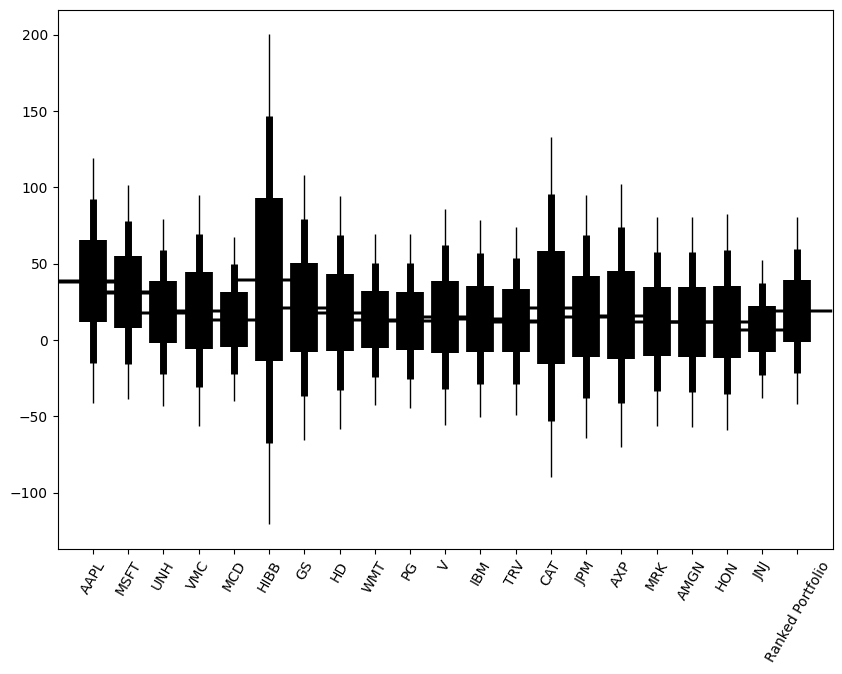

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

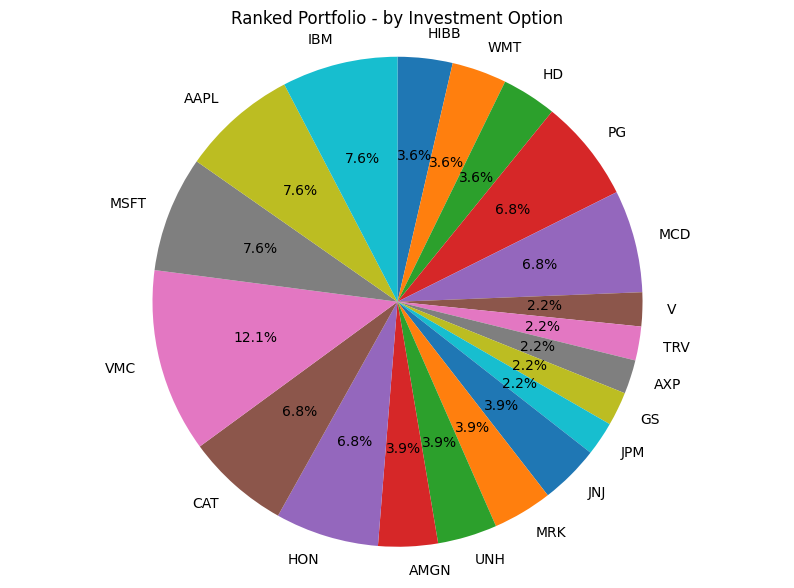

HIBB   0.04
WMT    0.04
HD     0.04
PG     0.07
MCD    0.07
V      0.02
TRV    0.02
AXP    0.02
GS     0.02
JPM    0.02
JNJ    0.04
MRK    0.04
UNH    0.04
AMGN   0.04
HON    0.07
CAT    0.07
VMC    0.12
MSFT   0.08
AAPL   0.08
IBM    0.08



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    AAPL                           0.0765
    MSFT                           0.0765
    UNH                            0.0393
    VMC                            0.1212
    MCD                            0.0676
    HIBB                           0.0362
    GS                             0.0224
    HD                             0.0362
    WMT                            0.0362
    PG                             0.0676
    V                              0.0224
    IBM                            0.0765
    TRV                            0.0224
    CAT                            0.0683
    JPM                            0.0224
    AXP                            0.0224
    MRK                            0.0393
    AMGN                           0.0393
    HON                            0.0683
    JNJ                            0.0393


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...............

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.11
    annual_return              20.03
    std_dev                    18.09
    worst typical down year   -16.15
    black_swan                -34.25


Ranked Portfolio Weights:
    AAPL                           0.1300
    MSFT                           0.1300
    UNH                            0.1100
    VMC                            0.0000
    MCD                            0.0600
    HIBB                           0.0000
    GS                             0.1000
    HD                             0.0600
    WMT                            0.0000
    PG                             0.1000
    V                              0.0000
    IBM                            0.0500
    TRV                            0.0000
    CAT                            0.0000
    JPM                            0.0000
    AXP                            0.0000
    MRK                            0.0500
  

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).